In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
import numpy as np
import os
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter

In [2]:
markers = ['o', 's', '+', '^', '.', '*']
LEGEND_SIZE=15
LABEL_SIZE=18
TICK_SIZE=15
FIG_W_SIZE=6
FIG_H_SIZE=3
META_WIDTH = 5
y_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
META_YLIM=(1,2000000)
META_WIDTH = 5

In [ ]:
DATA_DIR="data/"

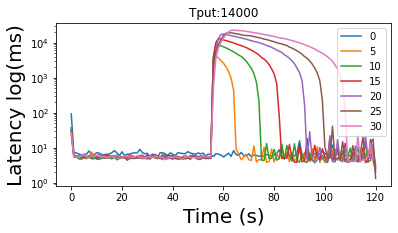

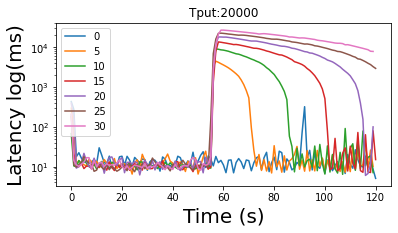

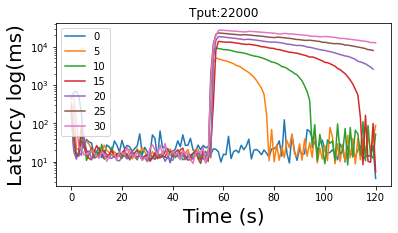

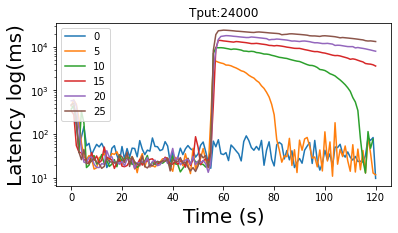

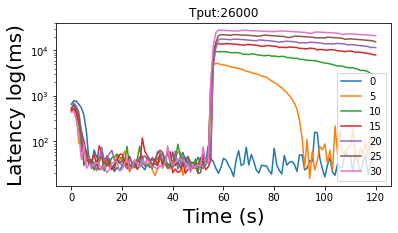

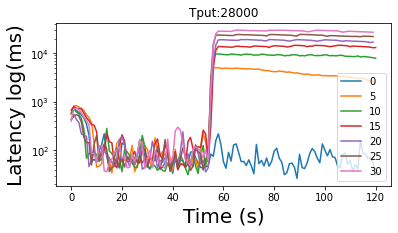

In [4]:
fixed_param = 10 # Max Retries
tputs = [10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000, 26000, 28000]
durations = [0, 5, 10, 15, 20, 25, 30]
prefix = DATA_DIR + "meta3_vuln"
for t in tputs:
    fig,ax = plt.subplots(figsize=(FIG_W_SIZE,FIG_H_SIZE))
    ax.set_yscale('log')
    ax.set_xlabel('Time (s)', fontsize=20)
    ax.set_ylabel('Latency log(ms)', fontsize=20)
    ax.set_title('Tput:' + str(t))
    for d in durations:
        fname = prefix + "_" + str(t) + "_" + str(d) + "_" + str(fixed_param) + ".csv"
        if not os.path.exists(fname):
            continue
        df = pd.read_csv(fname)
        ax.plot(df['start_rel'], df.avg_lat, label=str(d))
    ax.legend()
    plt.show()

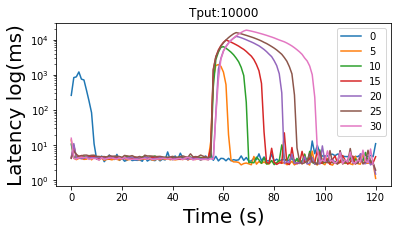

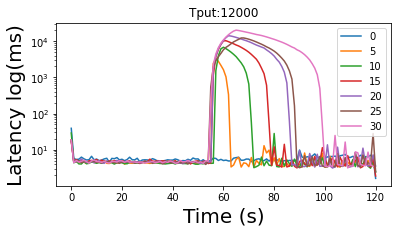

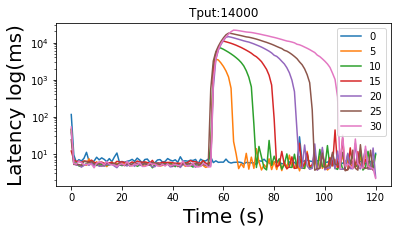

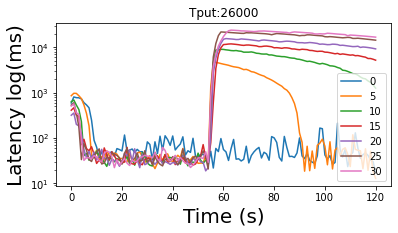

In [5]:
fixed_param = 5 # Max Retries
tputs = [10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000, 26000, 28000]
durations = [0, 5, 10, 15, 20, 25, 30]
prefix = DATA_DIR + "meta3_vuln"
for t in tputs:
    fig,ax = plt.subplots(figsize=(FIG_W_SIZE,FIG_H_SIZE))
    ax.set_yscale('log')
    ax.set_xlabel('Time (s)', fontsize=20)
    ax.set_ylabel('Latency log(ms)', fontsize=20)
    ax.set_title('Tput:' + str(t))
    for d in durations:
        fname = prefix + "_" + str(t) + "_" + str(d) + "_" + str(fixed_param) + ".csv"
        if not os.path.exists(fname):
            continue
        df = pd.read_csv(fname)
        ax.plot(df['start_rel'], df.avg_lat, label=str(d))
    ax.legend()
    plt.show()

In [6]:
fig, ax = plt.subplots(figsize=(FIG_W_SIZE+2,FIG_H_SIZE))
ax.set_xlabel('Requests per Second', fontsize=LABEL_SIZE)
ax.set_ylabel('Trigger Duration (s)', fontsize=LABEL_SIZE)
ax.set_xlim([10000,28000])
ax.set_xticklabels(["10K", "12K", "14K", "16K", "18K", "20K", "22K", "24K", "26K", "28K"])
ax.set_ylim([0, 30])
ax.tick_params(labelsize=TICK_SIZE)
stable_region_x = [10000, 12000, 14000, 16000]
stable_region_y = [30, 30, 30, 30]
ax.fill_between(stable_region_x, stable_region_y, color='#7BB4E3')
ax.text(11000, 15, "Stable region", fontsize=15)
x = [10000, 12000, 14000, 16000, 18000, 20000, 22000, 24000, 26000, 28000]
meta_retry_10y = [30, 30, 30, 30, 25, 25, 20, 15, 10, 5]
meta_retry_5y = [30, 30, 30, 30, 25, 25, 25, 15, 15, 10]
ax.fill_between(x, meta_retry_5y, 30, color='red', alpha=0.8)
ax.fill_between(x[3:], meta_retry_10y[3:], color='yellow', alpha=0.3)
ax.fill_between(x, meta_retry_5y, meta_retry_10y, color='orange', alpha=0.7)
ax.text(18000, 10, "Vulnerable region", fontsize=15)
ax.text(24000, 20, "Metastable\nfailure\nregion", fontsize=15)
ax.plot(x, meta_retry_5y, color='black', linestyle='--', label='5 Retries')
ax.plot(x, meta_retry_10y, color='gray', linestyle='-', label='10 Retries')
ax.legend(fontsize=LEGEND_SIZE, loc='upper left')
fig.savefig('metastability_vulnerability.png', bbox_inches='tight', dpi=1200)
plt.show()